In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
col_names = ['admit', 'gre', 'gpa', 'rank']
data = pd.read_stata('/content/binary.dta')
print(data.shape)
data.head()

(400, 4)


,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [ ]:
print(data.isnull().sum())

admit    0
gre      0
gpa      0
rank     0
dtype: int64


In [ ]:
feature_cols =['gre','gpa','rank']
x = data[feature_cols]
y = data['admit']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.28,random_state=5)

In [ ]:
print("Training set:", x_train.shape, y_train.shape)
print("test set:", x_test.shape, y_test.shape)

Training set: (287, 3) (287,)
test set: (113, 3) (113,)


In [ ]:
model = LogisticRegression(solver='lbfgs' ,max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

conf_mat = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[64 12]
 [31  6]]


In [ ]:
accuracy_score= metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score: ',accuracy_score)
print('Accuracy in Percentage: ',int(accuracy_score*100),'%')

Accuracy Score:  0.6194690265486725
Accuracy in Percentage:  61 %


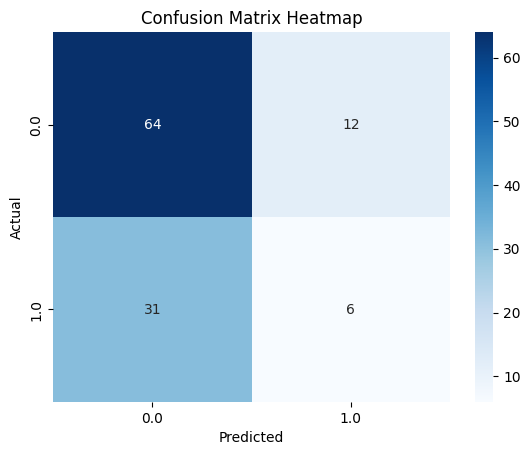

In [ ]:
conf_df = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
sn.heatmap(conf_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.show()

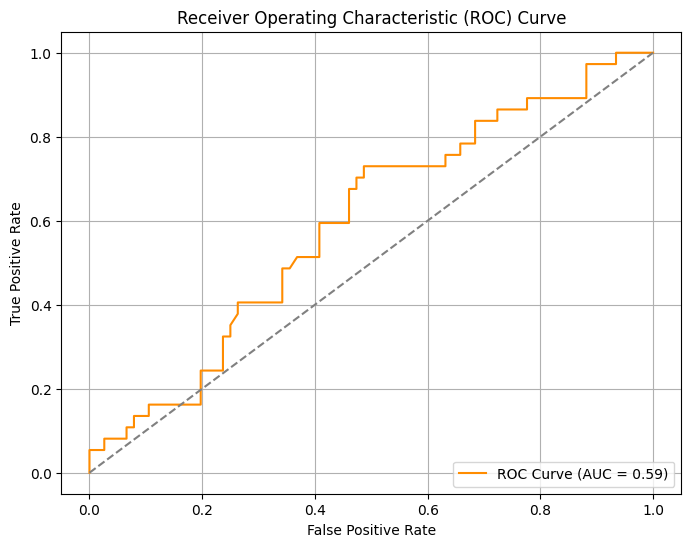

In [ ]:
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Probabilities for class 1

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc), color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()